# Importing necessary packages

In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import random
import tensorflow as tf

# Seeding for reproducibility

In [2]:
random.seed(0)

np.random.seed(0)

tf.random.set_seed(0)

# Data Curation

In [3]:
!pip install kaggle


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = 'C:/Users/akank/Downloads'  # Adjust the path if needed


In [7]:
import json

# Correct the path to where your kaggle.json is located
kaggle_credentails = json.load(open("C:/Users/akank/Downloads/kaggle.json"))

# Access the username and key from the file
print(kaggle_credentails['username'])
print(kaggle_credentails['key'])


cirigiriakanksha
4e55d3f1d90baed4cb937cf0dc851949


# Setup Kaggle API key as environment variables

In [8]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from zipfile import ZipFile

with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [8]:
import os

# List contents of the "plantvillage dataset" directory
print(os.listdir("plantvillage dataset"))
print(os.listdir("C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage dataset"))




['color', 'grayscale', 'segmented']
['color', 'grayscale', 'segmented']


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\akank\AppData\Local\Temp\ipykernel_4432\279720880.py:5: SyntaxWarning: invalid escape sequence '\p'
  print(os.listdir("C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage dataset"))


In [26]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


**Number of Classes = 38**

In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


# Data Preprocessing

In [10]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


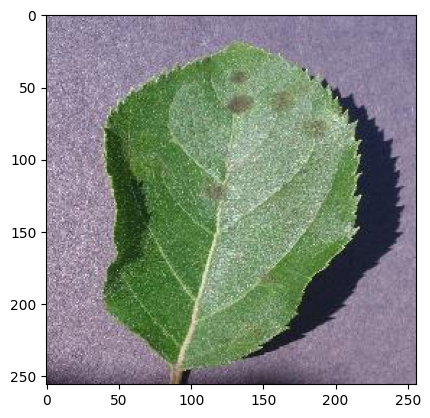

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Add this import

image_path = r"C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage dataset\color\Apple___Apple_scab\0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.JPG"

img = mpimg.imread(image_path)

print(img.shape)

# Display the image
plt.imshow(img)
plt.show()



In [12]:
image_path = r"C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage dataset\color\Apple___Apple_scab\0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.JPG"


img = mpimg.imread(image_path)

print(img)

[[[157 147 172]
  [128 118 143]
  [ 89  79 104]
  ...
  [130 121 152]
  [128 119 150]
  [119 110 141]]

 [[119 109 134]
  [153 143 168]
  [172 162 187]
  ...
  [130 121 152]
  [132 123 154]
  [125 116 147]]

 [[161 151 176]
  [152 142 167]
  [117 107 132]
  ...
  [136 127 158]
  [140 131 162]
  [134 125 156]]

 ...

 [[ 62  50  70]
  [ 52  40  60]
  [ 75  63  83]
  ...
  [147 132 155]
  [151 136 159]
  [153 138 161]]

 [[ 71  59  79]
  [ 41  29  49]
  [ 39  27  47]
  ...
  [157 142 165]
  [157 142 165]
  [154 139 162]]

 [[ 47  35  55]
  [ 60  48  68]
  [ 52  40  60]
  ...
  [159 144 167]
  [152 137 160]
  [142 127 150]]]


In [29]:
img_size = 224
batch_size = 32

# Train Test Split

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Now you can use ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [31]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [32]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


# Convolutional Neural Network

In [33]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size
img_size = 128  # Example image size, you can change it based on your dataset

# Create the ImageDataGenerator for data loading
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Assuming you have a directory with subfolders for each class
train_generator = data_gen.flow_from_directory(
     r"C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage dataset",  # Replace with the actual path to your dataset
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',  # Change this based on your problem, e.g., 'binary' for binary classification
    subset='training'  # This is for training data
)

validation_generator = data_gen.flow_from_directory(
    r"C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage dataset",  # Replace with the actual path to your dataset
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',  # Change this based on your problem
    subset='validation'  # This is for validation data
)

# Define the model
model = models.Sequential()

# Add layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))  # Use train_generator.num_classes for output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Found 130333 images belonging to 3 classes.
Found 32583 images belonging to 3 classes.


c:\Users\akank\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,766,019 (56.33 MB)

 Trainable params: 14,766,019 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

# Model summary

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,766,019 (56.33 MB)

 Trainable params: 14,766,019 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

c:\Users\akank\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4072/4072 ━━━━━━━━━━━━━━━━━━━━ 11559s 3s/step - accuracy: 0.9830 - loss: 0.0665 - val_accuracy: 0.8290 - val_loss: 1.5891


# Model Evaluation

In [29]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 160s 157ms/step - accuracy: 0.8297 - loss: 1.5879
Validation Accuracy: 82.90%


# Building a Predictive System

In [35]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [36]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [37]:
import json

with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

print("Class indices loaded:", class_indices)


Class indices loaded: {'0': 'Apple___Apple_scab', '1': 'Apple___Black_rot', '2': 'Apple___Cedar_apple_rust', '3': 'Apple___healthy', '4': 'Blueberry___healthy', '5': 'Cherry_(including_sour)___Powdery_mildew', '6': 'Cherry_(including_sour)___healthy', '7': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', '8': 'Corn_(maize)___Common_rust_', '9': 'Corn_(maize)___Northern_Leaf_Blight', '10': 'Corn_(maize)___healthy', '11': 'Grape___Black_rot', '12': 'Grape___Esca_(Black_Measles)', '13': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', '14': 'Grape___healthy', '15': 'Orange___Haunglongbing_(Citrus_greening)', '16': 'Peach___Bacterial_spot', '17': 'Peach___healthy', '18': 'Pepper,_bell___Bacterial_spot', '19': 'Pepper,_bell___healthy', '20': 'Potato___Early_blight', '21': 'Potato___Late_blight', '22': 'Potato___healthy', '23': 'Raspberry___healthy', '24': 'Soybean___healthy', '25': 'Squash___Powdery_mildew', '26': 'Strawberry___Leaf_scorch', '27': 'Strawberry___healthy', '28': 'Tomato___B

In [38]:
class_indices

{'0': 'Apple___Apple_scab',
 '1': 'Apple___Black_rot',
 '2': 'Apple___Cedar_apple_rust',
 '3': 'Apple___healthy',
 '4': 'Blueberry___healthy',
 '5': 'Cherry_(including_sour)___Powdery_mildew',
 '6': 'Cherry_(including_sour)___healthy',
 '7': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '8': 'Corn_(maize)___Common_rust_',
 '9': 'Corn_(maize)___Northern_Leaf_Blight',
 '10': 'Corn_(maize)___healthy',
 '11': 'Grape___Black_rot',
 '12': 'Grape___Esca_(Black_Measles)',
 '13': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 '14': 'Grape___healthy',
 '15': 'Orange___Haunglongbing_(Citrus_greening)',
 '16': 'Peach___Bacterial_spot',
 '17': 'Peach___healthy',
 '18': 'Pepper,_bell___Bacterial_spot',
 '19': 'Pepper,_bell___healthy',
 '20': 'Potato___Early_blight',
 '21': 'Potato___Late_blight',
 '22': 'Potato___healthy',
 '23': 'Raspberry___healthy',
 '24': 'Soybean___healthy',
 '25': 'Squash___Powdery_mildew',
 '26': 'Strawberry___Leaf_scorch',
 '27': 'Strawberry___healthy',
 '28': 'Toma

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image_class(model, image_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust size based on your model
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)  # Get index of highest probability
    class_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_index)]
    return class_name


In [40]:
import json

# Load the JSON file
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Print the class indices in a readable format
for key, value in class_indices.items():
    print(f"Class {key}: {value}")


Class 0: Apple___Apple_scab
Class 1: Apple___Black_rot
Class 2: Apple___Cedar_apple_rust
Class 3: Apple___healthy
Class 4: Blueberry___healthy
Class 5: Cherry_(including_sour)___Powdery_mildew
Class 6: Cherry_(including_sour)___healthy
Class 7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Class 8: Corn_(maize)___Common_rust_
Class 9: Corn_(maize)___Northern_Leaf_Blight
Class 10: Corn_(maize)___healthy
Class 11: Grape___Black_rot
Class 12: Grape___Esca_(Black_Measles)
Class 13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Class 14: Grape___healthy
Class 15: Orange___Haunglongbing_(Citrus_greening)
Class 16: Peach___Bacterial_spot
Class 17: Peach___healthy
Class 18: Pepper,_bell___Bacterial_spot
Class 19: Pepper,_bell___healthy
Class 20: Potato___Early_blight
Class 21: Potato___Late_blight
Class 22: Potato___healthy
Class 23: Raspberry___healthy
Class 24: Soybean___healthy
Class 25: Squash___Powdery_mildew
Class 26: Strawberry___Leaf_scorch
Class 27: Strawberry___healthy
Class 28: To

In [5]:
import json

# Define the data
class_indices = {
    "0": "Apple___Apple_scab",
    "1": "Apple___Black_rot",
    "2": "Apple___Cedar_apple_rust",
    "3": "Apple___healthy",
    "4": "Blueberry___healthy",
    "5": "Cherry_(including_sour)___Powdery_mildew",
    "6": "Cherry_(including_sour)___healthy",
    "7": "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "8": "Corn_(maize)___Common_rust_",
    "9": "Corn_(maize)___Northern_Leaf_Blight",
    "10": "Corn_(maize)___healthy",
    "11": "Grape___Black_rot",
    "12": "Grape___Esca_(Black_Measles)",
    "13": "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "14": "Grape___healthy",
    "15": "Orange___Haunglongbing_(Citrus_greening)",
    "16": "Peach___Bacterial_spot",
    "17": "Peach___healthy",
    "18": "Pepper,_bell___Bacterial_spot",
    "19": "Pepper,_bell___healthy",
    "20": "Potato___Early_blight",
    "21": "Potato___Late_blight",
    "22": "Potato___healthy",
    "23": "Raspberry___healthy",
    "24": "Soybean___healthy",
    "25": "Squash___Powdery_mildew",
    "26": "Strawberry___Leaf_scorch",
    "27": "Strawberry___healthy",
    "28": "Tomato___Bacterial_spot",
    "29": "Tomato___Early_blight",
    "30": "Tomato___Late_blight",
    "31": "Tomato___Leaf_Mold",
    "32": "Tomato___Septoria_leaf_spot",
    "33": "Tomato___Spider_mites Two-spotted_spider_mite",
    "34": "Tomato___Target_Spot",
    "35": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "36": "Tomato___Tomato_mosaic_virus",
    "37": "Tomato___healthy"
}

# Save to a JSON file
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f, indent=4)  # `indent=4` makes the JSON pretty-printed


In [46]:
# Check the model's input shape
print(model.input_shape)


(None, 150, 150, 3)


In [5]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the JSON file for class indices
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Print the class indices in a readable format
for key, value in class_indices.items():
    print(f"Class {key}: {value}")

# Load the trained model
model = tf.keras.models.load_model(r'C:\portfolio\Plant-Disease-Prediction-using-CNN\plant_leaf_disease_model.h5')  # Replace with your model's path

# Load and preprocess the image
img_path = r"C:\portfolio\Plant-Disease-Prediction-using-CNN\plantvillage-dataset\plantvillage dataset\color\Orange___Haunglongbing_(Citrus_greening)\0a0e1e0f-e0d2-4a9b-9265-ec636592d0b2___CREC_HLB 7565.JPG"  # Replace with the path of the image you want to classify
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the model's expected input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image if needed (depending on model training)

# Check the input shape
print("Model input shape:", model.input_shape)

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions)  # Index of the class with highest probability
predicted_class = class_indices[str(predicted_class_index)]  # Get the class name using the index

# Print the prediction
print(f"The model predicts the image is of class: {predicted_class}")





Class 0: Apple___Apple_scab
Class 1: Apple___Black_rot
Class 2: Apple___Cedar_apple_rust
Class 3: Apple___healthy
Class 4: Blueberry___healthy
Class 5: Cherry_(including_sour)___Powdery_mildew
Class 6: Cherry_(including_sour)___healthy
Class 7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Class 8: Corn_(maize)___Common_rust_
Class 9: Corn_(maize)___Northern_Leaf_Blight
Class 10: Corn_(maize)___healthy
Class 11: Grape___Black_rot
Class 12: Grape___Esca_(Black_Measles)
Class 13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Class 14: Grape___healthy
Class 15: Orange___Haunglongbing_(Citrus_greening)
Class 16: Peach___Bacterial_spot
Class 17: Peach___healthy
Class 18: Pepper,_bell___Bacterial_spot
Class 19: Pepper,_bell___healthy
Class 20: Potato___Early_blight
Class 21: Potato___Late_blight
Class 22: Potato___healthy
Class 23: Raspberry___healthy
Class 24: Soybean___healthy
Class 25: Squash___Powdery_mildew
Class 26: Strawberry___Leaf_scorch
Class 27: Strawberry___healthy
Class 28: To

In [44]:
model.save('my_model.keras')